# Two-athlete strategy example

In [1]:
from qiskit import transpile, QuantumCircuit
from iqm.qiskit_iqm import IQMFakeApollo
from qiskit.providers.basic_provider import BasicSimulator
import numpy as np

0.9272952180016122
2.214297435588181


In [ ]:
varphi0 = 2*np.asin(np.sqrt(0.2)) # bad athlete (20% of winning)
varphi1 = 2*np.asin(np.sqrt(0.8)) # good athlete (80% of winning)

print(varphi0)
print(varphi1)

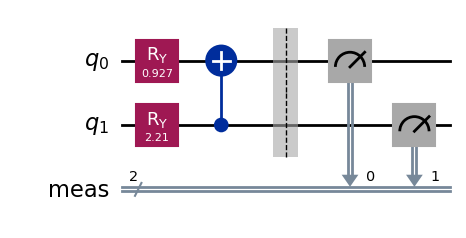

In [2]:
circuit = QuantumCircuit(2)
circuit.ry(varphi0,0)
circuit.ry(varphi1,1)
circuit.cx(1, 0) # entanglement: q1 helps q0
circuit.measure_all()
circuit.draw('mpl')

In [3]:
#backend = IQMFakeApollo()
backend = BasicSimulator()
transpiled_circuit = transpile(circuit, backend=backend)
job = backend.run(transpiled_circuit.reverse_bits(), shots=100000)
print(job.result().get_counts())


{'11': 64085, '01': 15945, '00': 16014, '10': 3956}


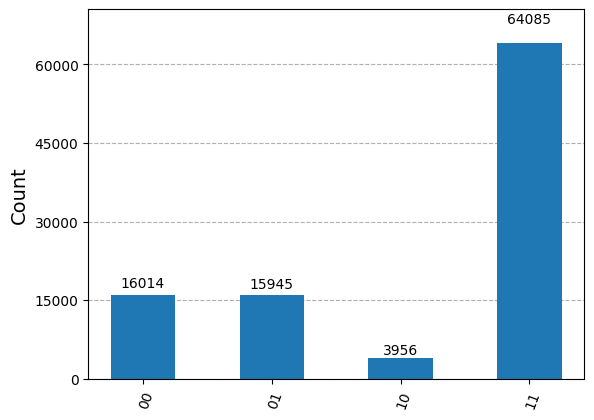

In [4]:
from qiskit.visualization import plot_histogram

plot_histogram(job.result().get_counts())